In [28]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# opening STAC catalog

catalog = pystac_client.Client.open(
    #"https://storage.googleapis.com/dgds-data-public/coclico/coclico-stac/catalog.json" # cloud API
    r"p:\1000545-054-globalbeaches\15_GlobalCoastalAtlas\coclicodata\current\catalog.json" # P drive API 
)
catalog

id: coclico-catalog
title: CoCliCo STAC Catalog
description: CoCliCo Catalog
type: Catalog
"assets: {'metadata': {'href': 'https://www.deltares.nl/en/news/development-of-a-new-european-platform-on-climate-services-for-coastal-risks-and-adaptation/', 'type': 'application/html', 'title': 'Deltares Website', 'description': 'Deltares Website about CoCliCo', 'roles': ['metadata']}}"
summaries: {'keywords': ['CoCliCo']}
"extent: {'spatial': {'bbox': [[-180, -90, 180, 90]]}, 'temporal': {'interval': [['2015-10-22T00:00:00Z', None]]}}"
license: various
id: ssl
title: Extreme surge level
"description: Dataset with extreme Storm Surge Levels (SSL) at the European scale. SSL are estimated for three climate scenarios (Historical, RCP4.5 and RCP8.5) for eight return periods (5, 10, 20, 50, 100, 200, 500 and 1000) according to the Peak Over Threshold method. This dataset is part of the [LISCOAST](https://data.jrc.ec.europa.eu/collection/LISCOAST) project. See this [article](https://doi.org/10.1007/s00382-016-3019-5) for more dataset-specific information."


In [4]:
list(catalog.get_children())

[<CollectionClient id=ssl>,
 <CollectionClient id=wef>,
 <CollectionClient id=eesl>,
 <CollectionClient id=floodmaps>,
 <CollectionClient id=sc>,
 <CollectionClient id=cbca>,
 <CollectionClient id=cfr>,
 <CollectionClient id=cm>,
 <CollectionClient id=smd>,
 <CollectionClient id=cisi>,
 <CollectionClient id=cisi>,
 <CollectionClient id=shore_mon>]

In [5]:
href = catalog.get_child("shore_mon").assets["data"].href

In [7]:
ds = xr.open_zarr(href)
ds

<xarray.Dataset>
Dimensions:             (stations: 1837203, time: 38)
Coordinates: (12/18)
    coastline_idint     (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    continent           (stations) |S23 dask.array<chunksize=(28707,), meta=np.ndarray>
    country             (stations) |S40 dask.array<chunksize=(28707,), meta=np.ndarray>
    country_id          (stations) |S7 dask.array<chunksize=(114826,), meta=np.ndarray>
    err_changerate      (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    err_timespan        (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    ...                  ...
    no_shorelines       (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    rmse                (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
  * time                (time) datetime64[ns] 1984-01-01 ... 2021-01-01
    timespan            (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    transect_geom       (stations) |S92 dask.array<chunksize=(14354,), meta=np.ndarray>
    transect_id         (stations) |S15 dask.array<chunksize=(57413,), meta=np.ndarray>
Dimensions without coordinates: stations
Data variables:
    changerate          (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    changerate_unc      (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    outliers            (stations, time) float64 dask.array<chunksize=(57413, 3), meta=np.ndarray>
    sandy               (stations) int8 dask.array<chunksize=(459301,), meta=np.ndarray>
    sp                  (stations, time) float64 dask.array<chunksize=(57413, 3), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Luijendijk, A., Hagenaars, G., Ranasinghe, R., Baart...
    CITATION:            Luijendijk, A., Hagenaars, G., Ranasinghe, R. et al....
    COMMENT:             
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         The Shoreline Monitor is a dataset that incorporates...
    ...                  ...
    SPATIAL_EXTENT:      [-180, -90, 180, 90]
    TAGS:                ['civil engineering', 'geomorphology', 'shoreline dy...
    TEMPORAL_EXTENT:     ['1984-01-01T00:00:00Z', '2021-01-01T00:00:00Z']
    TITLE:               The Shoreline Monitor
    TITLE_ABBREVIATION:  shore_mon
    UNITS:

In [37]:
# plot data
# function to extract ssl values at certain station for certain scenario

# outliers??
len(ds.isel(stations=0)["outliers"].values)
ds.isel(stations=0)["sp"].values[list(map(bool,ds.isel(stations=0)["outliers"].values))]
ds.isel(stations=0)["sp"].values

array([nan])

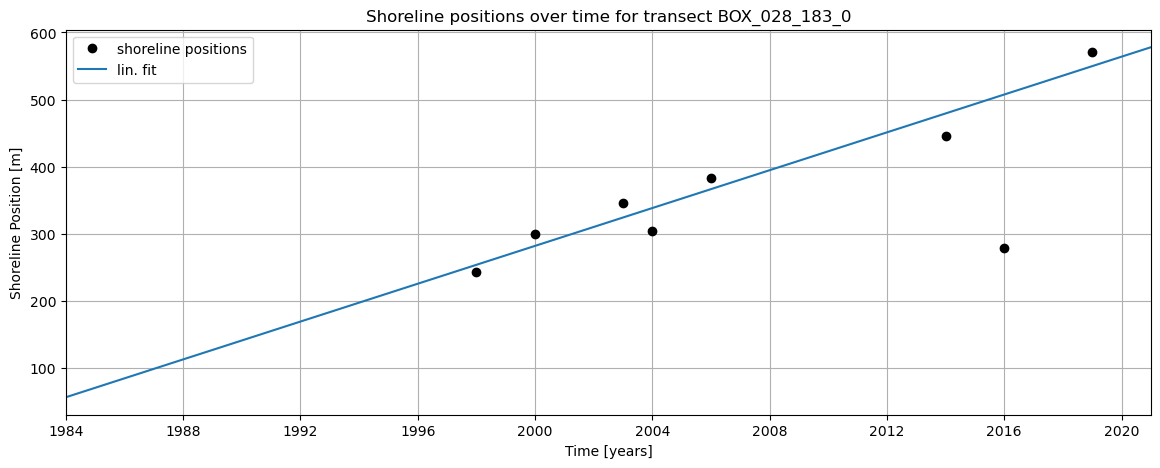

In [82]:
station = 0  # select station
# TODO: color the outlier
# TODO: add more info to the plot (sandy, uncertainty etc)

time_inds = np.array([i for i in range(len(ds.time.values))])
cr = ds.isel(stations=station)["changerate"].values
cr_unc = ds.isel(stations=station)["intercept"].values

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(ds.time, ds.isel(stations=station)["sp"].values, 'ko', label="shoreline positions")
#ax.plot(ds.time, ds.isel(stations=station)["outliers"].values, 'mo', label="outliers")
ax.plot(ds.time, time_inds*cr + cr_unc, label="lin. fit")
ax.set_xlabel("Time [years]")
ax.set_ylabel("Shoreline Position [m]")
ax.set_title(
    "Shoreline positions over time for transect %s"%ds.isel(stations=station)["transect_id"].values.tolist().decode("utf-8") 
)
plt.grid()
plt.xlim(ds.time[0], ds.time[-1])
plt.legend();

In [87]:
# filter spatially to show changerates
min_lon = 3.369
min_lat = 51.372
max_lon = 7.275
max_lat = 53.727

mask_lon = (ds.lon >= min_lon) & (ds.lon <= max_lon)
mask_lat = (ds.lat >= min_lat) & (ds.lat <= max_lat)

cropped_ds = ds.where(mask_lon & mask_lat, drop=True)
cropped_ds

<xarray.Dataset>
Dimensions:             (stations: 3611, time: 38)
Coordinates: (12/18)
    coastline_idint     (stations) float64 dask.array<chunksize=(363,), meta=np.ndarray>
    continent           (stations) |S23 dask.array<chunksize=(382,), meta=np.ndarray>
    country             (stations) |S40 dask.array<chunksize=(382,), meta=np.ndarray>
    country_id          (stations) |S7 dask.array<chunksize=(3611,), meta=np.ndarray>
    err_changerate      (stations) float64 dask.array<chunksize=(363,), meta=np.ndarray>
    err_timespan        (stations) float64 dask.array<chunksize=(363,), meta=np.ndarray>
    ...                  ...
    no_shorelines       (stations) float64 dask.array<chunksize=(363,), meta=np.ndarray>
    rmse                (stations) float64 dask.array<chunksize=(363,), meta=np.ndarray>
  * time                (time) datetime64[ns] 1984-01-01 ... 2021-01-01
    timespan            (stations) float64 dask.array<chunksize=(363,), meta=np.ndarray>
    transect_geom       (stations) |S92 dask.array<chunksize=(407,), meta=np.ndarray>
    transect_id         (stations) |S15 dask.array<chunksize=(363,), meta=np.ndarray>
Dimensions without coordinates: stations
Data variables:
    changerate          (stations) float64 dask.array<chunksize=(363,), meta=np.ndarray>
    changerate_unc      (stations) float64 dask.array<chunksize=(363,), meta=np.ndarray>
    outliers            (stations, time) float64 dask.array<chunksize=(363, 3), meta=np.ndarray>
    sandy               (stations) float64 dask.array<chunksize=(363,), meta=np.ndarray>
    sp                  (stations, time) float64 dask.array<chunksize=(363, 3), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Luijendijk, A., Hagenaars, G., Ranasinghe, R., Baart...
    CITATION:            Luijendijk, A., Hagenaars, G., Ranasinghe, R. et al....
    COMMENT:             
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         The Shoreline Monitor is a dataset that incorporates...
    ...                  ...
    SPATIAL_EXTENT:      [-180, -90, 180, 90]
    TAGS:                ['civil engineering', 'geomorphology', 'shoreline dy...
    TEMPORAL_EXTENT:     ['1984-01-01T00:00:00Z', '2021-01-01T00:00:00Z']
    TITLE:               The Shoreline Monitor
    TITLE_ABBREVIATION:  shore_mon
    UNITS:

In [93]:
# TODO: enable .sel (does not work now) to speed up computation as this does not load entire dataset while .where does
# either add lon and lat to dimensions or use bounds to filter station index and then .sel these stations
# https://gis.stackexchange.com/questions/353698/how-to-clip-an-xarray-to-a-smaller-extent-given-the-lat-lon-coordinates
# check_crds = ds.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))

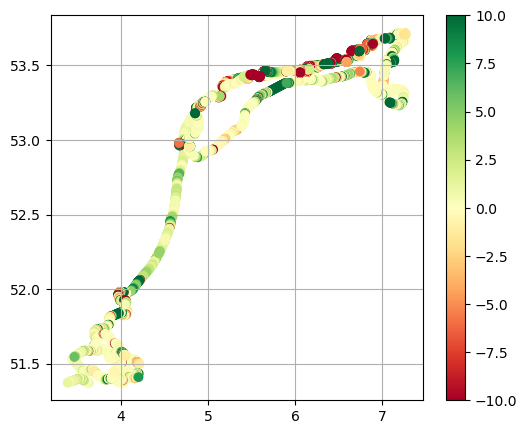

In [100]:
fig, ax = plt.subplots(figsize=(6, 5))
sc = ax.scatter(cropped_ds.lon, cropped_ds.lat, c=cropped_ds.changerate, vmin=-10, vmax=10, cmap='RdYlGn')
plt.colorbar(sc)

plt.grid()

In [43]:
import pandas as pd

check = pd.read_csv(r'p:\1000545-054-globalbeaches\03_Global_shorelines_update_2020\Transect_Mapping\Version_16102018\CSV\ShorelineMonitor_1984_2021_v1.5_set1.csv')

In [44]:
cropped_ds.plot()

(1837203, 27)


In [49]:
check.iloc[0]['dt']

'[14.0, 16.0, 19.0, 20.0, 22.0, 30.0, 32.0, 35.0]'

In [50]:
check.iloc[0]['dist']

'[242.54210813082503, 300.2922429940901, 346.20639275868433, 304.7749625017593, 383.10763818645245, 446.24764975878094, 279.56384321941186, 571.3984873143988]'

In [51]:
check.iloc[0]['outliers_1']

'[]'

In [52]:
check.iloc[0]['outliers_2']

'[6]'

In [ ]:
# see for fast spatial filter: https://github.com/openearth/coclico-workbench/blob/main/notebooks/coastal_mask_with_building_footprints.ipynb